# Service Qualtiy
##  Data Analysis on Incidents

An incident is an event that could lead to loss of, or disruption to, an organization's operations, services or functions. An Incident is defined as an unplanned interruption or reduction in quality of an IT service (a Service Interruption). 

Here, Incidents information are captured for multiple customers for the last few months by the Company. Customers have different locations/sites and have circuits associated with those sites. These circuits are also related to products. There are critical timestamps capturing life cycle milestones. Issue reason and closure reason capture additional information on the incidents.  

There are four datasets which provides specific information about incidents, customers, service-target and measured-reason. The datasets I used are descibed below.

*   **1.Fact_Sheet:-** This dataset contains information about the incidents such as inc_id, inc_creation_date , inc_resoultion_date, customer_name etc. 



*   **2.Customer_Sheet:-** This dataset contains information about the customers such as customer_name, customer_id , inc_site etc.



*   **3.Measurable_Reason_Sheet:-** This dataset consists of the information regarding incident's closure reason and the measured flag.



*   **4.Severity_Target:-** This dataset provides information about serverity ranging from 1 to 5 [1 being low, 5 being critical] and the company's resolution time target.









I aimed to solve following tasks by analysing the data and performing Data Preprocessing and Feature Engineering on the data.

**Task_1 - Key Volume of incidents** based on Customer, Site, Products, Issue Reason - Monthly

**Task_2 - Mean Time to Resolve (MTTR)** - Mean time taken from the creation of the incident (measured) to resolution based on Customer, Site, Products,Issue Reason - Monthly

**Task_3 - Mean Time to Resolve % (MTTR %)** - Number of incidents (measured) resolved within the target based on Customer, Site, Products, Issue Reason - Monthly 


**Task_4 - Service Availability %**
The percentage of, time service was available at a customer site 

* Down Time = Total time a service was unavailable at a customer site due to 
severity 1 or 2 (measured) incident 

* Total Planned Uptime = Total calendar days (hours) the service is set up to be available at the customer site 

* Service Availability Hours = Total Planned Uptime – Down Time 

Find Service Availability% based on Customer and Site - Monthly


**Task_5 - Any additional information we can get from data**




In [1]:
#Importing mandatory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Fact_Sheet data.
fact_data = pd.read_excel("Fact_Sheet.xlsx")
fact_data

,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,gbc,blooth Cmpny,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,NaN,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,NaN,Pie Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,INC072292,Ticket Manager,5,RESOLVED,2021-01-28 05:12:48,2021-01-29 11:38:24,NaT,Power Supply Fail,Power Supply Back,C9S,cloud Nine superstore,CRCTC9S-0001CKT-AAA,Data Center,C9S-DC-001
151,INC072293,Ticket Manager,3,INPROGRESS,2021-01-04 13:11:47,NaT,NaT,Circuit State Change,NaN,BC,Bluth Company,CRCTBBC-0001CKT-AAA,VOIP,GBC-CO-001
152,INC072294,Ticket Manager,1,INPROGRESS,2021-01-04 13:19:53,NaT,NaT,Switch Down,NaN,rbm,rosebud motel,CRCTRBM-0001CKT-AAA,PSTN,RBM-SC-001
153,INC072295,Ticket Manager,2,INPROGRESS,2021-01-04 13:53:10,NaT,NaT,Interface Down,NaN,PPI,Pie Piper Inc,CRCTPPI-0001CKT-AAA,Fiber Internet,PPI-SVC-001


By just looking at the above data, we can see that there are many missing values in the dataset. In addition to this, the inc_cust_id and int_cust_name have many datapoints with wrong spellings. In order to find the correct ids and names we need to check the customer_sheet data.  

In [3]:
#Importing Customer_Sheet data.
customer_data = pd.read_excel("Customer_Sheet.xlsx")
customer_data.head(10)

,inc_cust_id,inc_cust_name,inc_circuit,inc_site
0,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,GBC-BS-001
1,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,GBC-CO-001
2,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,GBC-DC-001
3,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,GBC-MH-001
4,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,GBC-MH-002
5,C9S,Cloud 9 Superstore,CRCTC9S-0001CKT-AAA,C9S-DC-001
6,C9S,Cloud 9 Superstore,CRCTC9S-0001CKT-AAA,C9S-STR-001
7,C9S,Cloud 9 Superstore,CRCTC9S-0001CKT-AAA,C9S-STR-002
8,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,DMP-CO-001
9,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,DMP-CO-002


In [4]:
#Importing Target_Time data.
Target_data = pd.read_excel("Severity_Target_Sheet.xlsx")
Target_data.head(10)

,Severity,Target Time To Resolve
0,1,2
1,2,4
2,3,8
3,4,24
4,5,48


In [5]:
fact_data[["inc_cust_id"]].describe()

,inc_cust_id
count,131
unique,22
top,DMP
freq,13


In [6]:
fact_data[["inc_cust_name"]].describe()

,inc_cust_name
count,149
unique,28
top,Bluth Company
freq,15


In Fact_sheet dataset, there are 22 and 28 unique values of customer_id and customer_name respectively. We need to verify this unqiue values by checking the customer_sheet dataset.

In [7]:
customer_data[["inc_cust_id"]].describe()

,inc_cust_id
count,27
unique,7
top,DMP
freq,6


In [8]:
customer_data[["inc_cust_name"]].describe()

,inc_cust_name
count,27
unique,7
top,"Dunder Mifflin Paper Company, Inc."
freq,6


By examining the customer_data, we found that there is a vast differene between the unique values of the same feature in different datasets. This indicated that the Fact_Sheet dataset has wrong values of features. You can see that we have one more common feature - "inc_site" in both dataset. So I compared its unique values in both datasets. 

In [9]:
fact_data[["inc_site"]].describe()

,inc_site
count,155
unique,26
top,PPI-SVC-001
freq,14


In [10]:
customer_data[["inc_site"]].describe()

,inc_site
count,27
unique,25
top,IBB-BRV-001
freq,2


By comparing unique values of "inc_site" in both datasets, I got to know that the difference is only 1 so I can use this feature to correct the values of customer_id and customer_name. 
Also the "inc_site" includes the customer_id in its value.

E.g inc_site = "GBC-MH-002" depicts the customer_id "GBC". 

In [11]:
for i in range(len(fact_data)):
    fact_data["inc_cust_id"][i] = fact_data["inc_site"][i][:3]
fact_data[["inc_cust_id"]].describe()
print(fact_data[["inc_cust_id"]]["inc_cust_id"].unique())
print(customer_data[["inc_cust_id"]]["inc_cust_id"].unique())


['GBC' 'IBB' 'TAR' 'PPI' 'C9S' 'DMP' 'RBM' 'IBC']
['GBC' 'C9S' 'DMP' 'IBB' 'PPI' 'RBM' 'TAR']


<ipython-input-11-c3eec2501cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["inc_cust_id"][i] = fact_data["inc_site"][i][:3]


Now the customer_id column is alomst ready, we just need to change one value and we can get that value by comparing unique values of customer_id from both datasets. 

In [12]:
for i in range(len(fact_data)):
    if fact_data["inc_cust_id"][i] == "IBC":
        fact_data["inc_cust_id"][i] = "IBB"
    if fact_data["inc_site"][i][:3] == "IBC":
        fact_data["inc_site"][i] = "IBB" + fact_data["inc_site"][i][3:]
print(fact_data[["inc_cust_id"]]["inc_cust_id"].unique())
print()


['GBC' 'IBB' 'TAR' 'PPI' 'C9S' 'DMP' 'RBM']



<ipython-input-12-2d0129e89aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["inc_cust_id"][i] = "IBB"
<ipython-input-12-2d0129e89aed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["inc_site"][i] = "IBB" + fact_data["inc_site"][i][3:]


In [13]:
fact_data[["inc_site"]].describe()

,inc_site
count,155
unique,25
top,PPI-SVC-001
freq,14


We need to correct the customer_name column too. I used dictonary to save the customer_id and customer_name from customer dataset and used that same dictonary to correct fact_data.

In [14]:
dict = {}
for i in range(len(customer_data)):
    if customer_data["inc_cust_id"][i] not in dict:
        dict[customer_data["inc_cust_id"][i]] = customer_data["inc_cust_name"][i]
dict

{'GBC': 'Bluth Company',
 'C9S': 'Cloud 9 Superstore',
 'DMP': 'Dunder Mifflin Paper Company, Inc.',
 'IBB': 'Iron Bank',
 'PPI': 'Pied Piper Inc',
 'RBM': 'Rose Bud Motel',
 'TAR': 'The Alibi Room'}

In [15]:
for i in range(len(fact_data)):
    if fact_data["inc_cust_id"][i] in dict:
        fact_data["inc_cust_name"][i] = dict[fact_data["inc_cust_id"][i]]
fact_data[["inc_cust_name"]].describe()

<ipython-input-15-031324f16eae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["inc_cust_name"][i] = dict[fact_data["inc_cust_id"][i]]


,inc_cust_name
count,155
unique,7
top,"Dunder Mifflin Paper Company, Inc."
freq,30


In [16]:
fact_data

,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,INC072292,Ticket Manager,5,RESOLVED,2021-01-28 05:12:48,2021-01-29 11:38:24,NaT,Power Supply Fail,Power Supply Back,C9S,Cloud 9 Superstore,CRCTC9S-0001CKT-AAA,Data Center,C9S-DC-001
151,INC072293,Ticket Manager,3,INPROGRESS,2021-01-04 13:11:47,NaT,NaT,Circuit State Change,NaN,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,VOIP,GBC-CO-001
152,INC072294,Ticket Manager,1,INPROGRESS,2021-01-04 13:19:53,NaT,NaT,Switch Down,NaN,RBM,Rose Bud Motel,CRCTRBM-0001CKT-AAA,PSTN,RBM-SC-001
153,INC072295,Ticket Manager,2,INPROGRESS,2021-01-04 13:53:10,NaT,NaT,Interface Down,NaN,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Fiber Internet,PPI-SVC-001


### The both columns are corrected and now I can start the first task.

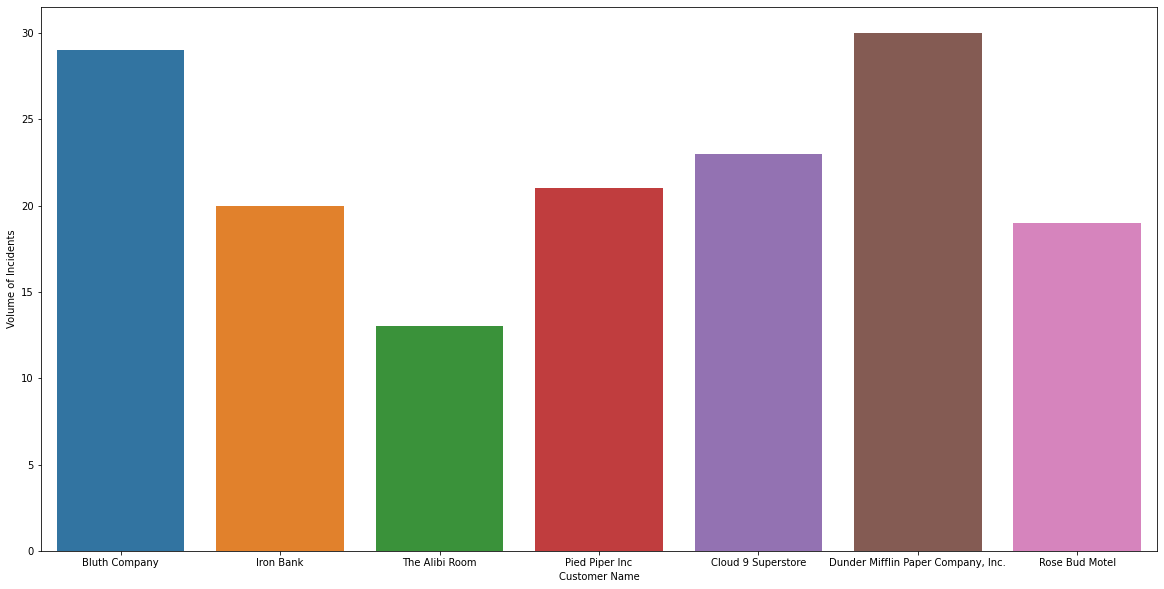

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(fact_data["inc_cust_name"])
plt.ylabel("Volume of Incidents")
plt.xlabel("Customer Name")
plt.show()

By sutdying the above figure, we can see that Dunder Mifflin Paper Company, Inc.encountered highest number of incidents(30) over a period of 4 months whilst the The Alibi Room reported lowerst number of incidents(14) in a period of 4 months. Also Dunder Mifflin Paper Company has the highest sites and The Alibi Room has the lowest sites amongst all the customers. So we can say that there is a linear relationship between Number of incidents and number of sites.  

## Task_1 :- Key Volume of incidents
For the first task, I need to find the Volume of incidents based on Customer, Site, Products, Issue Reason - Monthly. So first, I created a new column "Month" containing the Month of the Incident.

In [18]:
fact_data["Month"] = "Nan"
for i in range(len(fact_data)):
    fact_data["Month"][i]= fact_data["inc_creation_dt"][i].month
fact_data.head(10)

<ipython-input-18-af85070784a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["Month"][i]= fact_data["inc_creation_dt"][i].month


,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site,Month
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002,10
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001,10
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002,10
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001,10
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001,10
5,INC072174,Ticket Manager,1,CLOSED,2020-10-06 19:53:00,2020-10-07 09:58:04,2020-10-07 11:33:51,Host Down,Host Config Change,C9S,Cloud 9 Superstore,CRCTC9S-0001CKT-AAA,Fiber Internet,C9S-STR-002,10
6,INC072175,Ticket Manager,1,CLOSED,2020-10-06 20:10:25,2020-10-06 22:21:16,2020-10-06 22:22:04,Circuit Down,Circuit Config Change,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,Fiber Internet,IBB-WFL-001,10
7,INC072176,Ticket Manager,1,CLOSED,2020-10-06 21:00:01,2020-10-06 22:10:06,2020-10-06 22:21:04,Switch Down,Switch Incident Closed,IBB,Iron Bank,CRCTIBB-0001CKT-AAB,Fiber Internet,IBB-WFL-001,10
8,INC072177,Ticket Manager,4,CLOSED,2020-10-08 08:26:09,2020-10-09 09:35:20,2020-10-09 09:38:29,Interface State Change,No Trouble Found,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,DSL Internet,DMP-CO-003,10
9,INC072178,Ticket Manager,2,CLOSED,2020-10-08 08:32:59,2020-10-08 12:20:38,2020-10-08 12:22:38,Circuit Down,Circuit Config Change,RBM,Rose Bud Motel,CRCTRBM-0001CKT-AAA,DSL Internet,RBM-SC-001,10


             Bluth Company  Iron Bank  Dunder Mifflin Paper Company, Inc.  \
October-20               5          5                                   4   
November-20              8          6                                   9   
December-20              8          7                                   9   
January-20               8          2                                   8   

             Pied Piper Inc  Cloud 9 Superstore  The Alibi Room  \
October-20                3                   3               2   
November-20               4                   8               4   
December-20              10                   6               4   
January-20                4                   6               3   

             Rose Bud Motel  
October-20                2  
November-20               7  
December-20               3  
January-20                7  


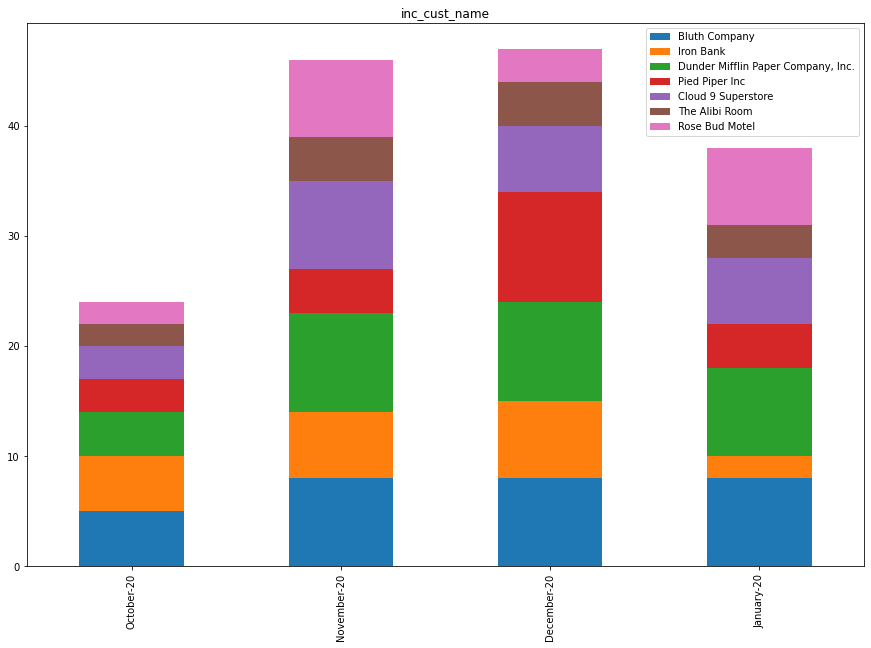

In [19]:
def bar_chart(feature):
    Oct_20 = fact_data[fact_data['Month']==10][feature].value_counts()
    Nov_20 = fact_data[fact_data['Month']==11][feature].value_counts()
    Dec_20 = fact_data[fact_data['Month']==12][feature].value_counts()
    Jan_21 = fact_data[fact_data['Month']==1][feature].value_counts()

    temp_df = pd.DataFrame([Oct_20,Nov_20,Dec_20,Jan_21])
    temp_df.index = ['October-20','November-20', 'December-20','January-20']
    temp_df.plot(kind='bar',stacked=True, figsize=(15,10))
    plt.title(feature)
    print(temp_df)

bar_chart('inc_cust_name')
#for i in fact_data[['inc_cust_id','inc_site', 'inc_issue_reason', 'inc_product']]:
    #bar_chart(i)
    #print()


In the above figure, different colors represts different companies and the length of the bar of particular company represents number of incidents reported by the company.

Here, we can say that the average length of "The Alibi Room" company is lower than others and the average length of the "Dunder Mifflin Paper Company" is higher than others. 

             IBB-KLD-001  DMP-CO-004  IBB-WFL-001  PPI-DC-001  GBC-DC-001  \
October-20           2.0         2.0          2.0         2.0         2.0   
November-20          NaN         NaN          2.0         2.0         3.0   
December-20          4.0         3.0          2.0         2.0         2.0   
January-20           NaN         NaN          NaN         1.0         1.0   

             DMP-CO-003  C9S-DC-001  GBC-MH-002  TAR-SSC-001  RBM-SC-003  ...  \
October-20          2.0         1.0         1.0          1.0         1.0  ...   
November-20         1.0         2.0         2.0          3.0         NaN  ...   
December-20         3.0         2.0         NaN          4.0         1.0  ...   
January-20          NaN         3.0         1.0          3.0         1.0  ...   

             C9S-STR-002  RBM-SC-001  IBB-BRV-001  RBM-SC-002  DMP-CO-001  \
October-20           1.0         1.0          1.0         NaN         NaN   
November-20          3.0         3.0          4.0     

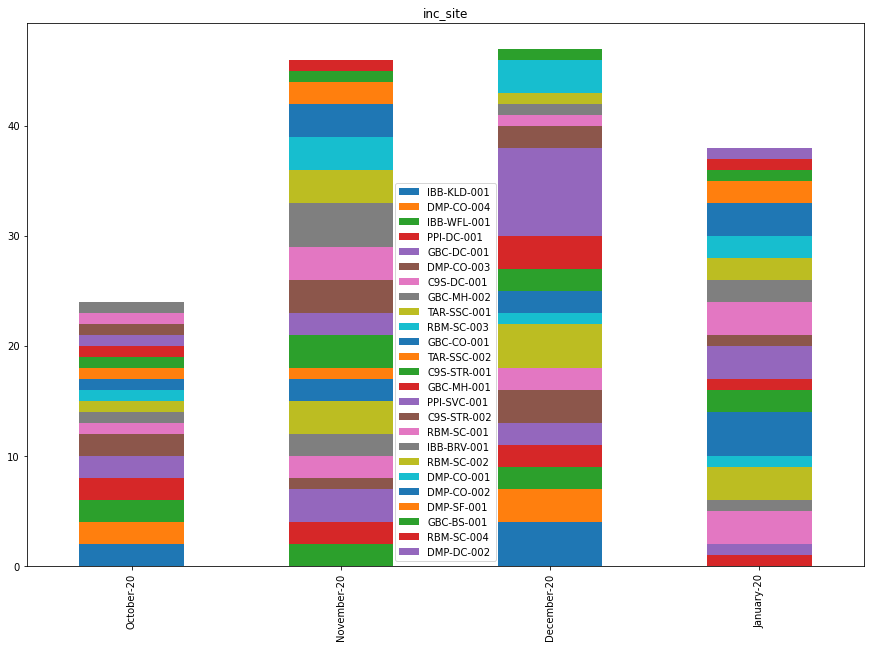

In [20]:
bar_chart('inc_site')

             Power Supply Fail  Cold Start  Circuit Down  \
October-20                 3.0         3.0           3.0   
November-20                8.0         3.0           4.0   
December-20                8.0         6.0           5.0   
January-20                 9.0         3.0           1.0   

             Circuit State Change  Switch State Change  \
October-20                    3.0                  2.0   
November-20                   2.0                  6.0   
December-20                   6.0                  6.0   
January-20                    2.0                  4.0   

             Interface State Change  Host Down  Switch Down  Interface Down  \
October-20                      2.0        2.0          2.0             2.0   
November-20                     2.0        4.0          4.0             4.0   
December-20                     3.0        6.0          3.0             2.0   
January-20                      NaN        3.0          5.0             4.0   

            

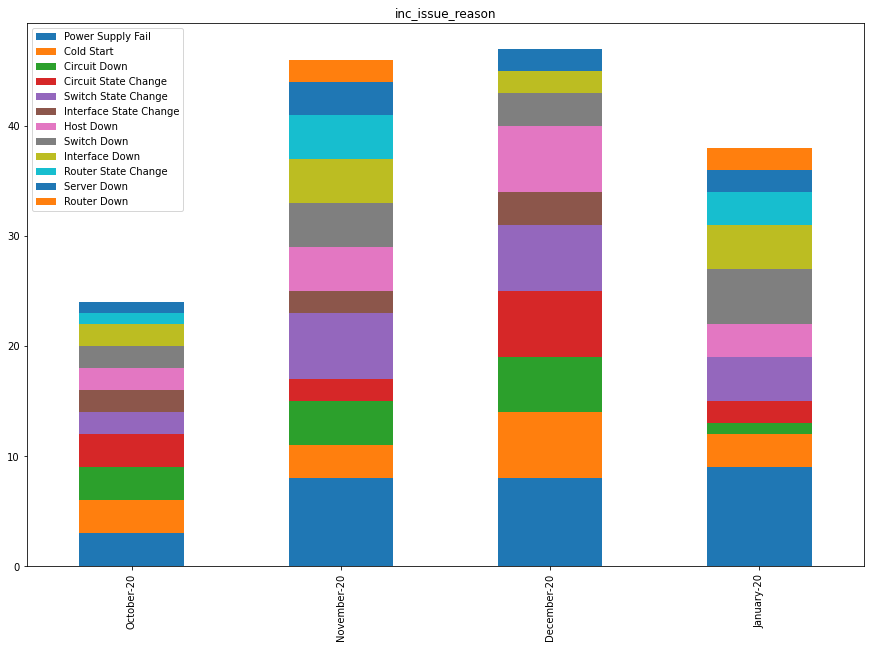

In [21]:
bar_chart('inc_issue_reason')

             DSL Internet  Fiber Internet  VOIP  VLAN   Virtual Server  \
October-20            8.0             5.0   3.0    3.0             2.0   
November-20          15.0             8.0   3.0    2.0             2.0   
December-20          14.0            11.0   7.0    7.0             2.0   
January-20           11.0             6.0   2.0    1.0             1.0   

             Physical Server  Data Center  VPN  PSTN  
October-20               2.0          1.0  NaN   NaN  
November-20              7.0          NaN  5.0   4.0  
December-20              2.0          2.0  NaN   2.0  
January-20               5.0          1.0  6.0   5.0  


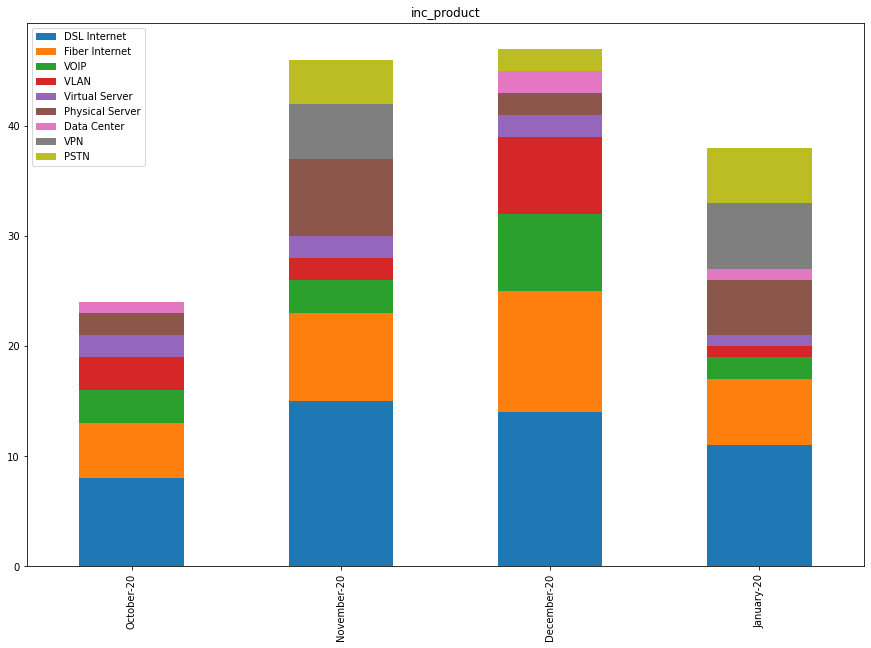

In [22]:
bar_chart('inc_product')

## Task_2 - Mean Time to Resolve (MTTR) 
In order to find the MTTR which is Mean time taken from the creation of the incident to resolution first we need to find the Resolution Time by applying below formula.

##### `Resolution Time = Incident_Resolution_Time - Incident_Creation_Time`

Some of values of "inc_resolution_dt" NULL as the compnay is still working on that incident. I deleted those rows as per the below code.

In [23]:
fact_data.dropna(subset = ["inc_resolution_dt"], inplace=True)
fact_data

,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site,Month
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002,10
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001,10
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002,10
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001,10
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,INC072290,Ticket Manager,5,RESOLVED,2021-01-26 01:21:08,2021-01-27 03:09:33,NaT,Cold Start,Dropped & Recovered,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,VPN,GBC-CO-001,1
147,INC072192,Alarm Response,3,RESOLVED,2021-01-26 04:30:59,2021-01-26 06:12:03,NaT,Switch State Change,Dropped & Recovered,RBM,Rose Bud Motel,CRCTRBM-0001CKT-AAA,DSL Internet,RBM-SC-003,1
148,INC072193,Alarm Response,4,RESOLVED,2021-01-27 01:58:40,2021-01-27 02:29:41,NaT,Power Supply Fail,Power Supply Back,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,VPN,DMP-CO-002,1
149,INC072291,Ticket Manager,2,RESOLVED,2021-01-27 08:55:54,2021-01-27 10:13:07,NaT,Interface Down,NaN,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,PSTN,TAR-SSC-001,1


In [24]:
fact_data["Resolution Time in hours"] = "Nan"
for i in range(len(fact_data)):
    difference = fact_data["inc_resolution_dt"][i] - fact_data["inc_creation_dt"][i]
    temp = (difference.seconds + int(str(difference)[0]) * 86400) / 3600
    fact_data["Resolution Time in hours"][i] = float("{:.2f}".format(temp))
fact_data

<ipython-input-24-ff5bfae62288>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["Resolution Time in hours"][i] = float("{:.2f}".format(temp))


,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site,Month,Resolution Time in hours
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002,10,5.07
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001,10,3.01
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002,10,50.91
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001,10,71.44
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001,10,71.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,INC072290,Ticket Manager,5,RESOLVED,2021-01-26 01:21:08,2021-01-27 03:09:33,NaT,Cold Start,Dropped & Recovered,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,VPN,GBC-CO-001,1,25.81
147,INC072192,Alarm Response,3,RESOLVED,2021-01-26 04:30:59,2021-01-26 06:12:03,NaT,Switch State Change,Dropped & Recovered,RBM,Rose Bud Motel,CRCTRBM-0001CKT-AAA,DSL Internet,RBM-SC-003,1,1.68
148,INC072193,Alarm Response,4,RESOLVED,2021-01-27 01:58:40,2021-01-27 02:29:41,NaT,Power Supply Fail,Power Supply Back,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,VPN,DMP-CO-002,1,0.52
149,INC072291,Ticket Manager,2,RESOLVED,2021-01-27 08:55:54,2021-01-27 10:13:07,NaT,Interface Down,NaN,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,PSTN,TAR-SSC-001,1,1.29


inc_cust_name
             Bluth Company  Iron Bank  The Alibi Room  Pied Piper Inc  \
October-20           18.45       2.21           56.98           41.13   
November-20          25.50      19.71           21.58           23.84   
December-20           8.97      33.74           13.87           33.04   
January-21            5.02      14.74            1.49            8.73   

             Cloud 9 Superstore  Dunder Mifflin Paper Company, Inc.  \
October-20                 6.42                                7.75   
November-20               29.71                               38.70   
December-20                6.76                               21.48   
January-21                 5.53                                6.68   

             Rose Bud Motel  
October-20            14.19  
November-20            9.17  
December-20           43.24  
January-21             2.76  


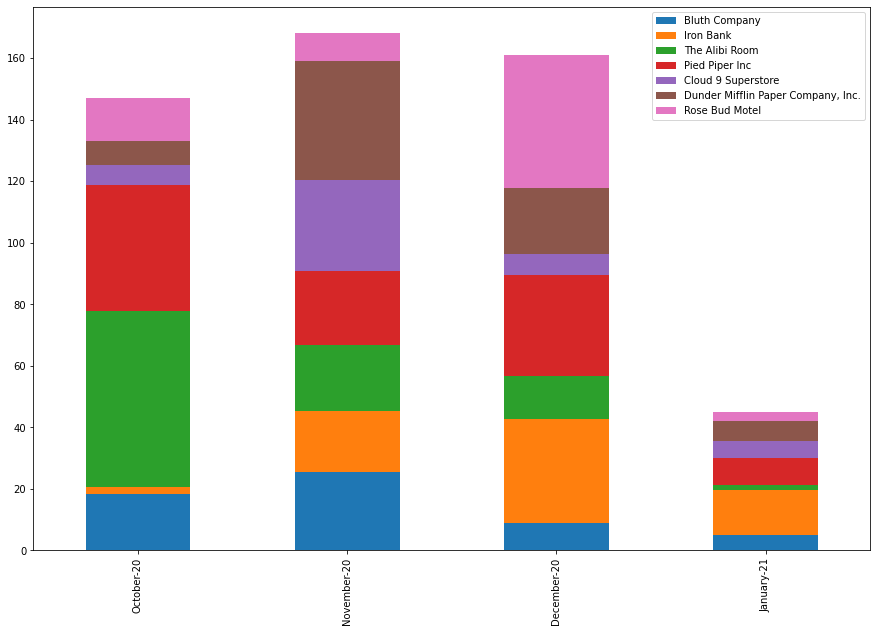

In [25]:
def bar_chart(feature):
    values = fact_data[feature].unique()
    arr = {}
    for i in values:
        for j in fact_data["Month"].unique():
            fact_data_by_month = fact_data[fact_data['Month']== j]
            fact_data_by_month_feature = fact_data_by_month[fact_data_by_month[feature] == i]
            mean_val = float("{:.2f}".format(fact_data_by_month_feature['Resolution Time in hours'].mean()))
            if i not in arr:
                arr[i] = [mean_val]
            else:
                arr[i].append(mean_val)
                
    temp_df = pd.DataFrame(data=arr) 
    temp_df.index = ['October-20','November-20', 'December-20','January-21']
    temp_df.plot(kind='bar',stacked=True, figsize=(15,10))
    print(f"{feature}")
    print(temp_df)
    print("=============================================================================")

#for i in df1[['inc_cust_id','inc_site', 'inc_issue_reason', 'inc_product']]:
bar_chart('inc_cust_name')


inc_site
             GBC-MH-002  IBB-BRV-001  TAR-SSC-002  GBC-DC-001  PPI-DC-001  \
October-20         5.07         3.01        50.91       37.95       48.70   
November-20        5.78        29.15        24.09       46.04        3.17   
December-20         NaN         9.98          NaN        1.06       66.25   
January-21         3.23        14.74          NaN        0.06        1.21   

             C9S-STR-002  IBB-WFL-001  DMP-CO-003  RBM-SC-001  GBC-CO-001  \
October-20         14.08         1.68       14.24        3.79        3.67   
November-20         1.51         0.84       28.57        4.02       26.14   
December-20        17.67        52.55       53.38       24.01        1.84   
January-21          0.14          NaN         NaN        1.89        9.26   

             ...  PPI-SVC-001  C9S-STR-001  RBM-SC-003  GBC-MH-001  \
October-20   ...        25.98         4.04       24.59        7.60   
November-20  ...        44.52         6.22         NaN         NaN   
December-

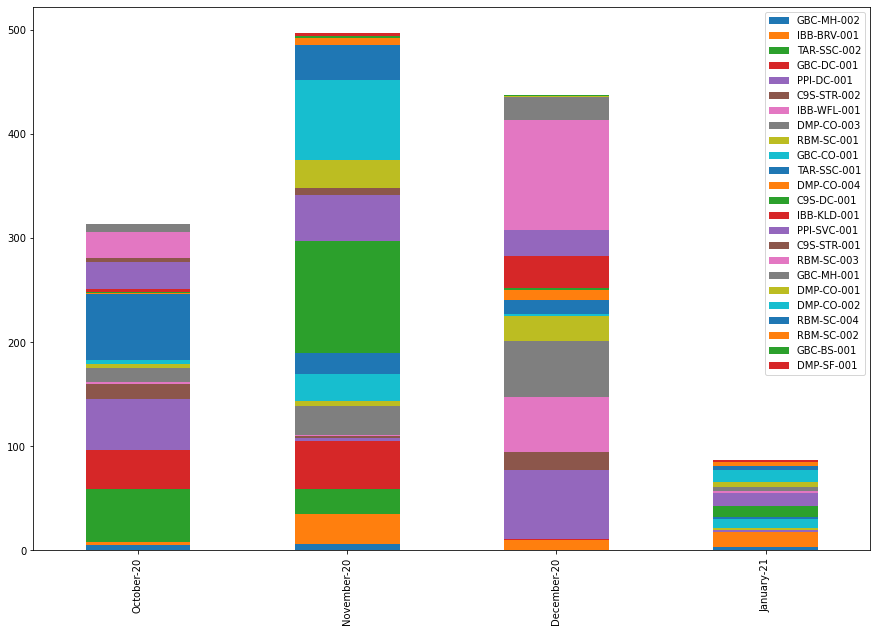

In [26]:
bar_chart('inc_site')

inc_issue_reason
             Interface Down  Switch State Change  Router State Change  \
October-20             3.35                 3.04                50.91   
November-20            6.04                13.88                25.82   
December-20            9.11                22.53                  NaN   
January-21             0.73                 3.44                12.14   

             Power Supply Fail  Cold Start  Host Down  Circuit Down  \
October-20               33.93       35.03       8.16          3.34   
November-20              47.49       90.40       5.43          1.02   
December-20              19.57       38.53       5.19         26.02   
January-21                9.14       17.09       0.74          1.57   

             Switch Down  Interface State Change  Circuit State Change  \
October-20          2.42                   12.71                 30.33   
November-20         1.65                   55.10                 30.12   
December-20         1.32               

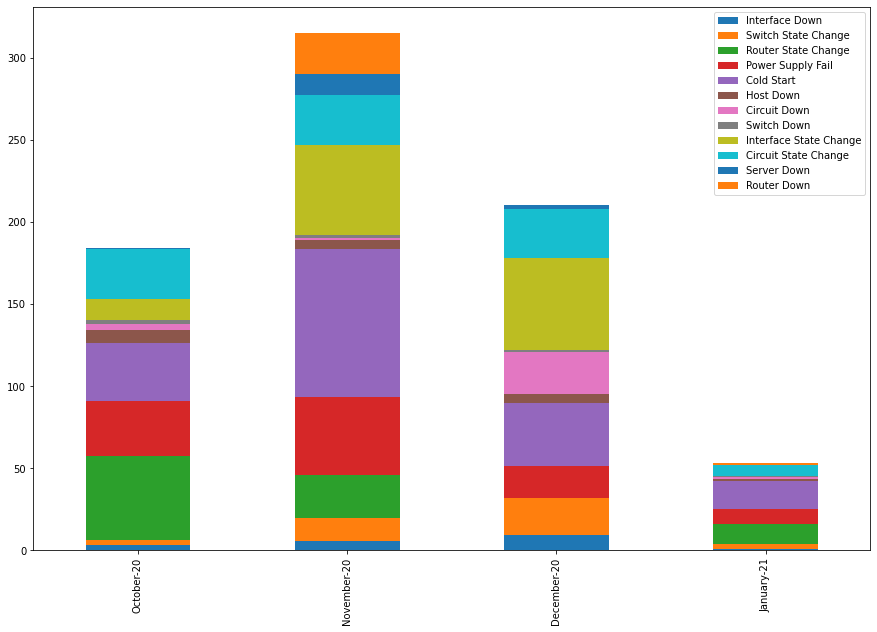

In [27]:
bar_chart('inc_issue_reason')

inc_product
             DSL Internet  VLAN   Physical Server  Virtual Server  \
October-20          22.80   2.89            48.66           37.98   
November-20         18.27   4.17            48.67           14.74   
December-20         26.65  17.67            66.25            1.06   
January-21           1.91  24.65             7.94            0.51   

             Fiber Internet   VOIP  Data Center   PSTN    VPN  
October-20             9.30   2.42         1.13    NaN    NaN  
November-20           14.63  53.11          NaN  16.08  32.18  
December-20           31.25   7.87         2.12  11.46    NaN  
January-21             0.31   6.12        30.43   2.38  11.05  


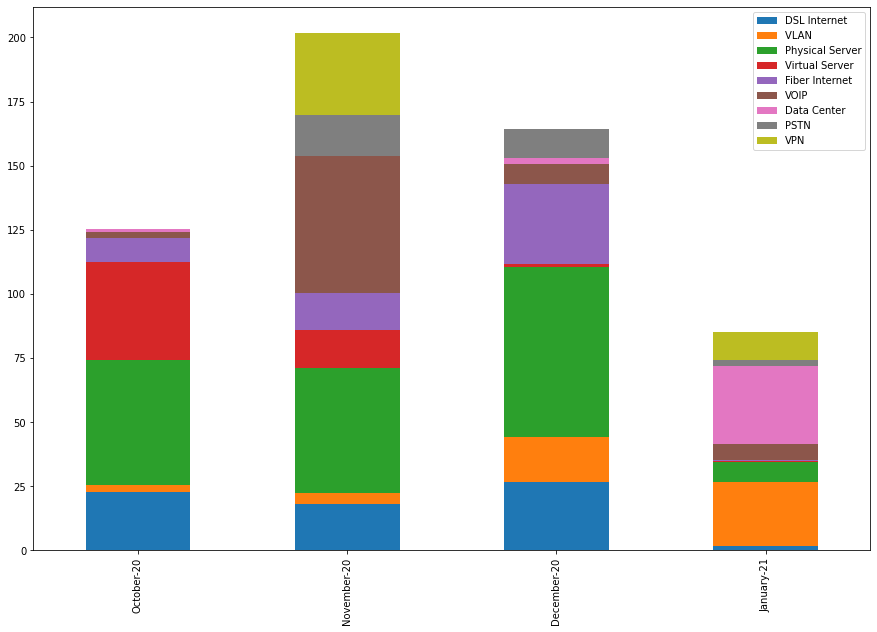

In [28]:
bar_chart('inc_product')

### Task_3 - Mean Time to Resolve % (MTTR %) - 
For Task_3 I need to find the Number of incidents resolved within the target. I am already having the "Resolution in hour" column, I just need to compare it with the Serverity_Target dataset and check if the particular incident is resolved within the target time. 

##### `MTTR % = (Number of Incidents resolved in time / Total Number of Incidents) * 100`

I added a column "Resolution_in_target_time" with values,

True if Incident was resolved in target time

False if Incident was not resolved in target time

In [29]:
fact_data["Resolution_in_target_time"] = "Nan"
for i in range(len(fact_data)):
    for (j,k) in zip(range(len(Target_data["Severity"])), range(len(Target_data["Target Time To Resolve"]))):
        if fact_data["inc_severity"][i] == Target_data["Severity"][j]:  
            if fact_data["Resolution Time in hours"][i] > Target_data["Target Time To Resolve"][k]:
                fact_data["Resolution_in_target_time"][i] = False
            else:
                fact_data["Resolution_in_target_time"][i] = True  
fact_data

<ipython-input-29-c436b6bf7c04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["Resolution_in_target_time"][i] = False
<ipython-input-29-c436b6bf7c04>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_data["Resolution_in_target_time"][i] = True


,inc_number,inc_source,inc_severity,inc_status,inc_creation_dt,inc_resolution_dt,inc_closure_dt,inc_issue_reason,inc_closure_reason,inc_cust_id,inc_cust_name,inc_circuit,inc_product,inc_site,Month,Resolution Time in hours,Resolution_in_target_time
0,INC072169,Ticket Manager,2,CLOSED,2020-10-02 02:54:15,2020-10-02 07:58:31,2020-10-07 08:01:51,Interface Down,Interface Config Change,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,DSL Internet,GBC-MH-002,10,5.07,False
1,INC072170,Ticket Manager,3,CLOSED,2020-10-02 07:15:21,2020-10-02 10:15:47,2020-10-02 10:28:24,Switch State Change,Dropped & Recovered,IBB,Iron Bank,CRCTIBB-0001CKT-AAA,VLAN,IBB-BRV-001,10,3.01,True
2,INC072171,Ticket Manager,3,CLOSED,2020-10-02 09:44:23,2020-10-04 12:39:10,2020-10-04 12:40:49,Router State Change,Dropped & Recovered,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,DSL Internet,TAR-SSC-002,10,50.91,False
3,INC072172,Ticket Manager,4,CLOSED,2020-10-05 11:24:29,2020-10-08 10:50:40,2020-10-14 16:04:25,Power Supply Fail,No Trouble Found,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,Physical Server,GBC-DC-001,10,71.44,False
4,INC072173,Ticket Manager,5,CANCELLED,2020-10-05 11:24:29,2020-10-08 10:55:40,2020-10-10 14:14:05,Cold Start,Ticket Cancelled,PPI,Pied Piper Inc,CRCTPPI-0001CKT-AAA,Virtual Server,PPI-DC-001,10,71.52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,INC072290,Ticket Manager,5,RESOLVED,2021-01-26 01:21:08,2021-01-27 03:09:33,NaT,Cold Start,Dropped & Recovered,GBC,Bluth Company,CRCTBBC-0001CKT-AAA,VPN,GBC-CO-001,1,25.81,True
147,INC072192,Alarm Response,3,RESOLVED,2021-01-26 04:30:59,2021-01-26 06:12:03,NaT,Switch State Change,Dropped & Recovered,RBM,Rose Bud Motel,CRCTRBM-0001CKT-AAA,DSL Internet,RBM-SC-003,1,1.68,True
148,INC072193,Alarm Response,4,RESOLVED,2021-01-27 01:58:40,2021-01-27 02:29:41,NaT,Power Supply Fail,Power Supply Back,DMP,"Dunder Mifflin Paper Company, Inc.",CRCTDMP-0001CKT-AAA,VPN,DMP-CO-002,1,0.52,True
149,INC072291,Ticket Manager,2,RESOLVED,2021-01-27 08:55:54,2021-01-27 10:13:07,NaT,Interface Down,NaN,TAR,The Alibi Room,CRCTTAR-0001CKT-AAA,PSTN,TAR-SSC-001,1,1.29,True


        Bluth Company  Iron Bank  The Alibi Room  Pied Piper Inc  \
Oct_20           40.0  80.000000             0.0       66.666667   
Nov_20           37.5  83.333333            50.0       75.000000   
Dec_20           75.0  28.571429            75.0       50.000000   
Jan_21          100.0  50.000000           100.0      100.000000   

        Cloud 9 Superstore  Dunder Mifflin Paper Company, Inc.  Rose Bud Motel  
Oct_20           33.333333                           50.000000       50.000000  
Nov_20           62.500000                           33.333333       57.142857  
Dec_20           50.000000                           55.555556       33.333333  
Jan_21          100.000000                           85.714286      100.000000  


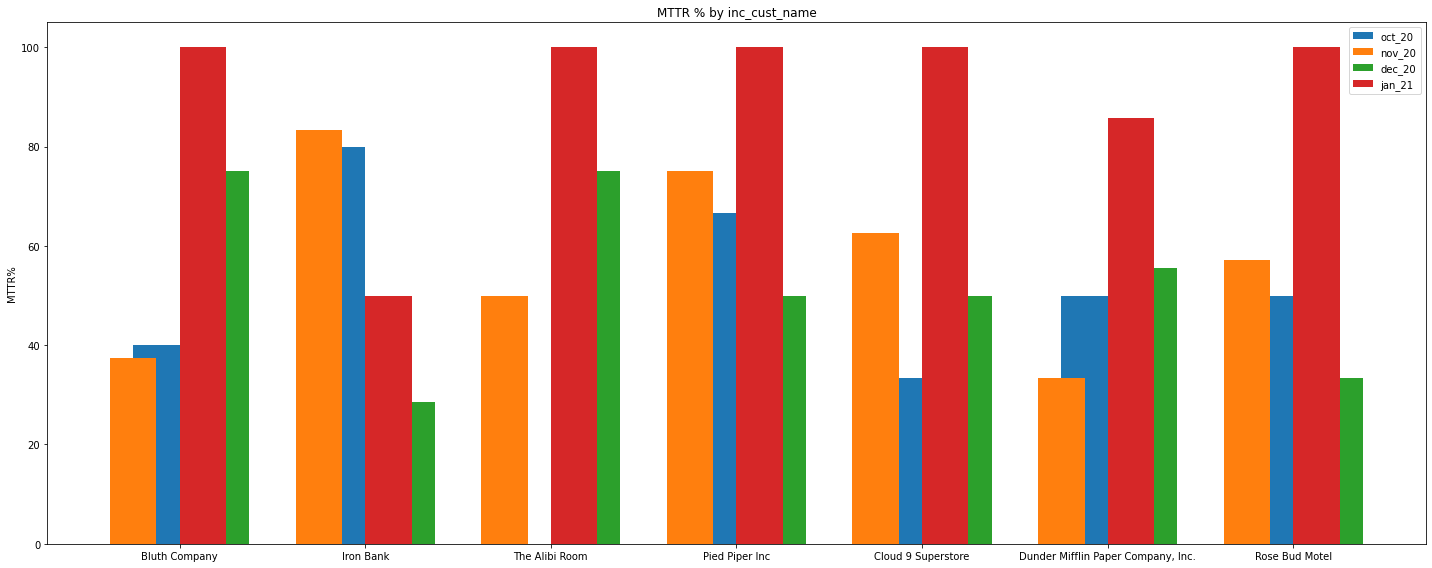

In [30]:
def bar_chart(feature):
    oct_20 = []
    nov_20 = []
    dec_20 = []
    jan_21 = []
    
    labels = fact_data[feature].unique()
    for i in labels:
        for j in fact_data["Month"].unique():
            fact_data_by_month = fact_data[fact_data['Month']== j]
            fact_data_by_month_feature = fact_data_by_month[fact_data_by_month[feature] == i]
            try:
                mttr = fact_data_by_month_feature["Resolution_in_target_time"].value_counts()[True] / fact_data_by_month_feature["Resolution_in_target_time"].count() * 100
            except:
                mttr = 0 
            if j == 10:
                oct_20.append(mttr)
            elif j == 11:
                nov_20.append(mttr)
            elif j == 12:
                dec_20.append(mttr)
            elif j == 1:
                jan_21.append(mttr)
    temp_df = pd.DataFrame([oct_20, nov_20, dec_20, jan_21], columns= labels, index = ["Oct_20", "Nov_20", "Dec_20", "Jan_21"])
    print(temp_df)
    x = np.arange(len(labels)) 
    width = 0.25

    fig, ax = plt.subplots(figsize=(20,8))
    rects1 = ax.bar(x - width/2 , oct_20, width, label='oct_20')
    rects2 = ax.bar(x - width, nov_20, width, label='nov_20')
    rects3 = ax.bar(x + width, dec_20, width, label='dec_20')
    rects4 = ax.bar(x + width/2, jan_21, width, label='jan_21')

  # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MTTR%')
    ax.set_title(f'MTTR % by {feature}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

#for i in df1[['inc_cust_id','inc_site', 'inc_issue_reason', 'inc_product']]:
bar_chart("inc_cust_name")


        GBC-MH-002  IBB-BRV-001  TAR-SSC-002  GBC-DC-001  PPI-DC-001  \
Oct_20         0.0        100.0            0   50.000000        50.0   
Nov_20        50.0         75.0            0   66.666667       100.0   
Dec_20         0.0        100.0            0  100.000000        50.0   
Jan_21       100.0         50.0            0  100.000000       100.0   

        C9S-STR-002  IBB-WFL-001  DMP-CO-003  RBM-SC-001  GBC-CO-001  ...  \
Oct_20          0.0         50.0   50.000000  100.000000         0.0  ...   
Nov_20        100.0        100.0    0.000000   66.666667         0.0  ...   
Dec_20          0.0          0.0   33.333333    0.000000        50.0  ...   
Jan_21        100.0          0.0    0.000000  100.000000       100.0  ...   

        PPI-SVC-001  C9S-STR-001  RBM-SC-003  GBC-MH-001  DMP-CO-001  \
Oct_20        100.0     0.000000         0.0  100.000000    0.000000   
Nov_20         50.0    66.666667         0.0    0.000000   33.333333   
Dec_20         50.0   100.000000     

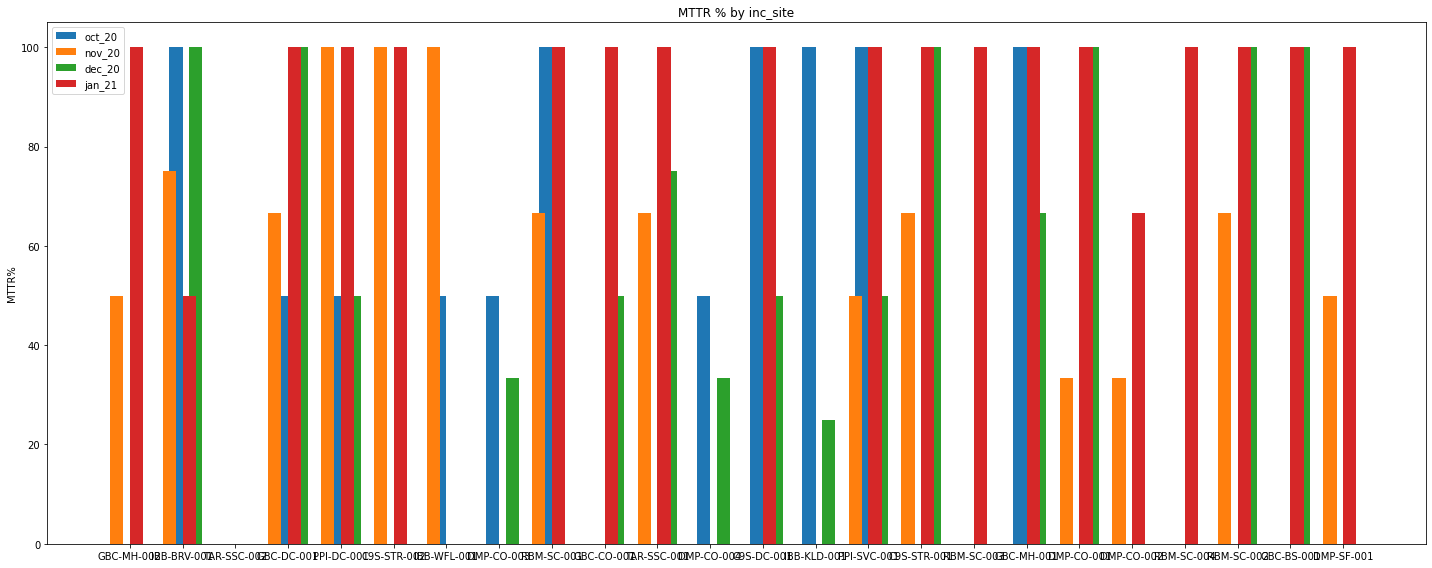

In [31]:
bar_chart("inc_site")

        Interface Down  Switch State Change  Router State Change  \
Oct_20            50.0           100.000000             0.000000   
Nov_20            50.0            83.333333            25.000000   
Dec_20            50.0            33.333333             0.000000   
Jan_21           100.0           100.000000            66.666667   

        Power Supply Fail  Cold Start   Host Down  Circuit Down  Switch Down  \
Oct_20          66.666667   66.666667    0.000000     33.333333    50.000000   
Nov_20          50.000000   33.333333   50.000000    100.000000    50.000000   
Dec_20          87.500000   33.333333   66.666667     40.000000    66.666667   
Jan_21          87.500000  100.000000  100.000000    100.000000   100.000000   

        Interface State Change  Circuit State Change  Server Down  Router Down  
Oct_20               50.000000             33.333333   100.000000          0.0  
Nov_20                0.000000             50.000000    66.666667         50.0  
Dec_20         

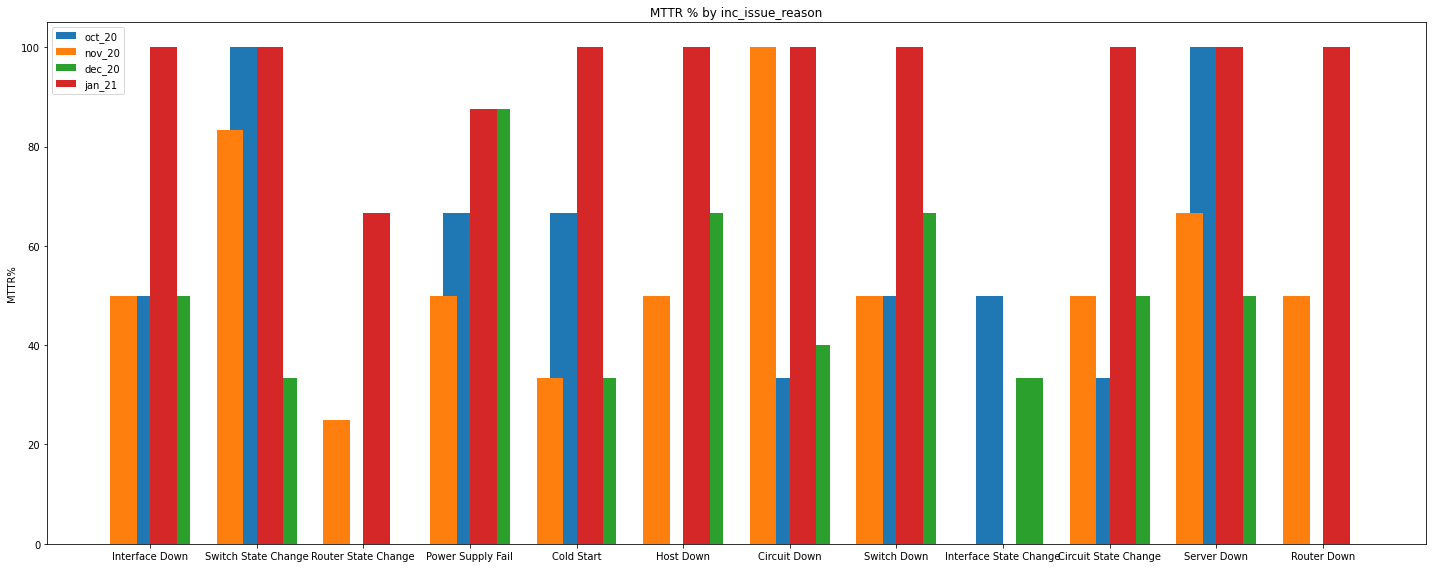

In [32]:
bar_chart("inc_issue_reason")

        DSL Internet       VLAN   Physical Server  Virtual Server  \
Oct_20     25.000000   66.666667        50.000000            50.0   
Nov_20     46.666667  100.000000        71.428571            50.0   
Dec_20     57.142857   42.857143        50.000000           100.0   
Jan_21    100.000000  100.000000        75.000000           100.0   

        Fiber Internet        VOIP  Data Center   PSTN        VPN  
Oct_20       60.000000   66.666667        100.0    0.0   0.000000  
Nov_20       87.500000    0.000000          0.0   50.0  20.000000  
Dec_20       36.363636   57.142857         50.0  100.0   0.000000  
Jan_21      100.000000  100.000000        100.0  100.0  83.333333  


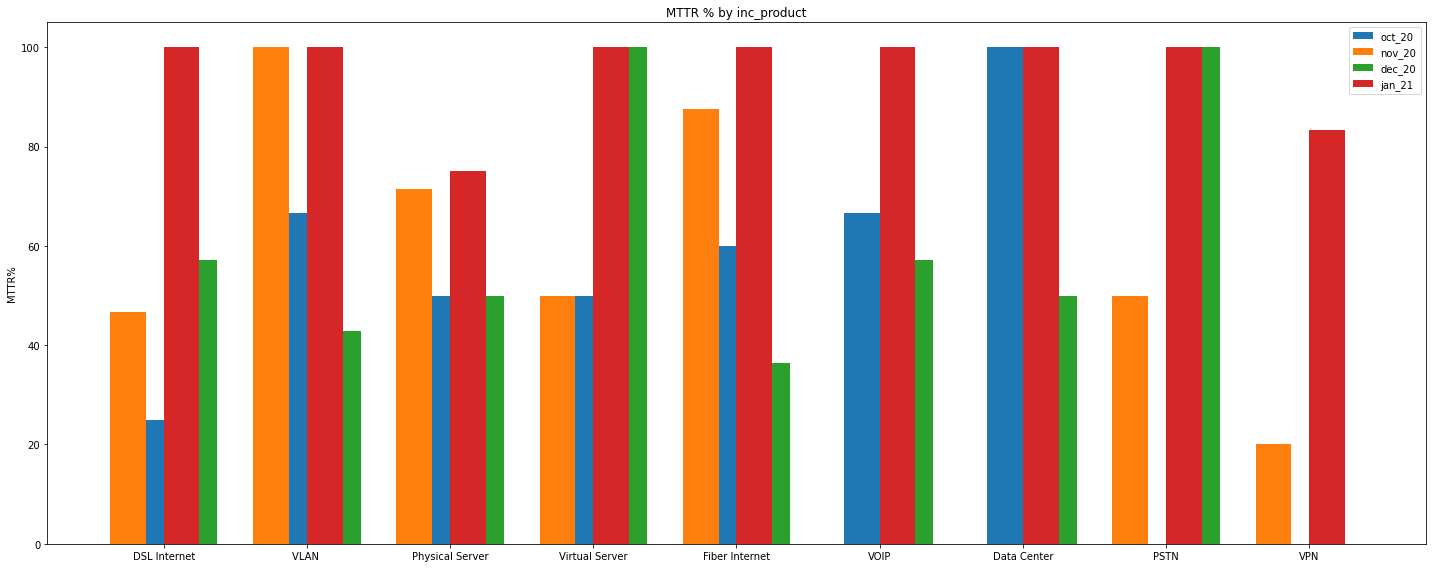

In [33]:
bar_chart("inc_product")

        Bluth Company   Iron Bank  The Alibi Room  Pied Piper Inc  \
Oct_20      98.825269   99.330645      100.000000      100.000000   
Nov_20      90.970833   99.768056       99.888889      100.000000   
Dec_20      99.467742   83.424731      100.000000       98.690860   
Jan_21      99.705645  100.000000       99.723118       99.954301   

        Cloud 9 Superstore  Dunder Mifflin Paper Company, Inc.  Rose Bud Motel  
Oct_20           97.412634                           99.698925       99.490591  
Nov_20           93.612500                           98.863889       99.737500  
Dec_20           95.811828                           99.331989       96.756720  
Jan_21           99.893817                           94.974462       99.716398  


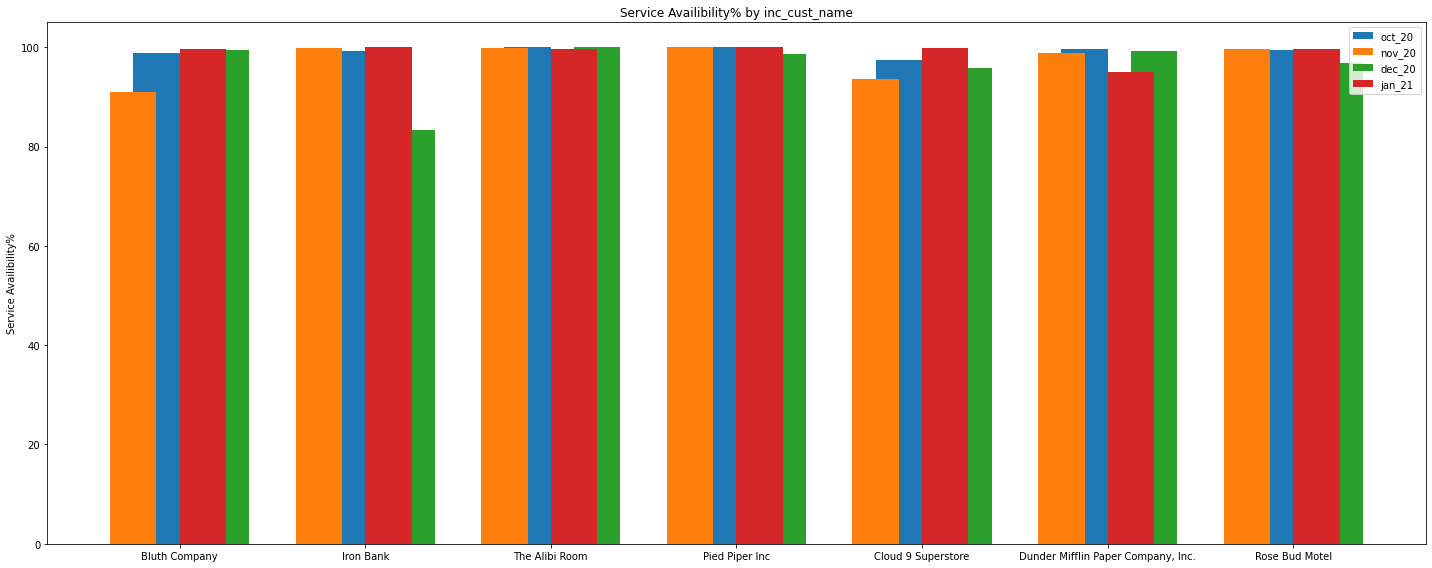

In [36]:
def bar_chart(feature):
    oct_20 = []
    nov_20 = []
    dec_20 = []
    jan_21 = []
  
    month_year = {10:31, 11:30, 12:31, 1:31}
    labels = fact_data[feature].unique()
    
    for i in labels:
        for j in fact_data["Month"].unique():
            fact_data_by_month = fact_data[fact_data['Month']== j]
            fact_data_by_month_feature = fact_data_by_month[fact_data_by_month[feature] == i]
            fact_data_by_month_feature_severity = fact_data_by_month_feature.loc[fact_data_by_month_feature['inc_severity'].isin([1,2])]
            down_time = fact_data_by_month_feature_severity["Resolution Time in hours"].sum()
            uptime = (month_year[j] * 24) - down_time
            service_avail = (uptime / (month_year[j] *24)) * 100
            if j == 10:
                oct_20.append(service_avail)
                service_avail = 0 
            elif j == 11:
                nov_20.append(service_avail)
                service_avail = 0 
            elif j == 12:
                dec_20.append(service_avail)
                service_avail = 0
            elif j == 1:
                jan_21.append(service_avail)
                service_avail = 0
    temp_df = pd.DataFrame([oct_20, nov_20, dec_20, jan_21], columns= labels, index = ["Oct_20", "Nov_20", "Dec_20", "Jan_21"])
    print(temp_df)

    x = np.arange(len(labels)) 
    width = 0.25

    fig, ax = plt.subplots(figsize=(20,8))
    rects1 = ax.bar(x - width/2 , oct_20, width, label='oct_20')
    rects2 = ax.bar(x - width, nov_20, width, label='nov_20')
    rects3 = ax.bar(x + width, dec_20, width, label='dec_20')
    rects4 = ax.bar(x + width/2, jan_21, width, label='jan_21')


    ax.set_ylabel('Service Availibility%')
    ax.set_title(f'Service Availibility% by {feature}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()
    
bar_chart("inc_cust_name")
    


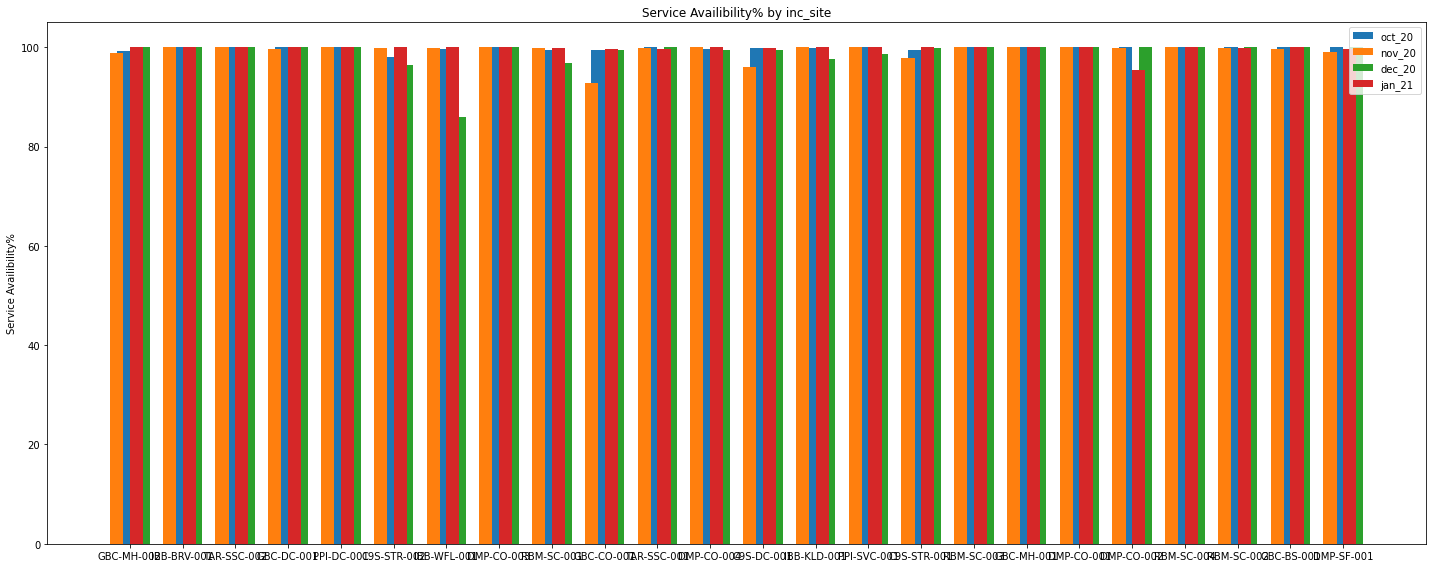

In [35]:
bar_chart("inc_site")